# Data preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv(r'D:\Data-Science\Gen_AI\NLP\NLP-Projects\Spam Classification\spam.tsv',sep = '\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


## Check for missing values

In [9]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [12]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Data is imbalanced
### TO balance both the classes, let's take same number of samples from ham class as well for model training

In [14]:
spam = df[df['label']=='spam']
ham = df[df['label']=='ham']
spam.shape,ham.shape

((747, 4), (4825, 4))

### Sample 747 records from the spam dataframe

In [18]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

### Now append this new ham dataframe to spam dataframe

In [20]:
data = pd.concat([spam,ham], axis=0)
data.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


### EDA

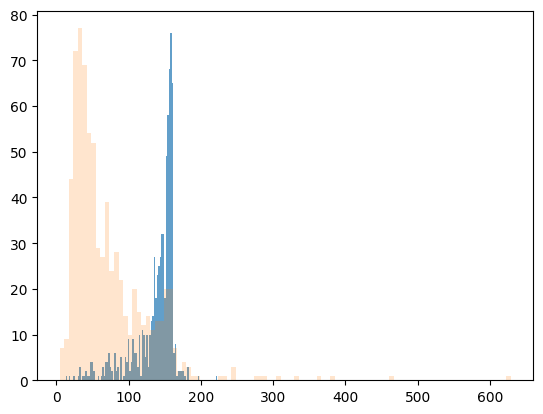

In [26]:
plt.hist(data[data['label']=='spam']['length'],bins =100, alpha = 0.7)
plt.hist(data[data['label']=='ham']['length'],bins =100, alpha = 0.2)
plt.show()

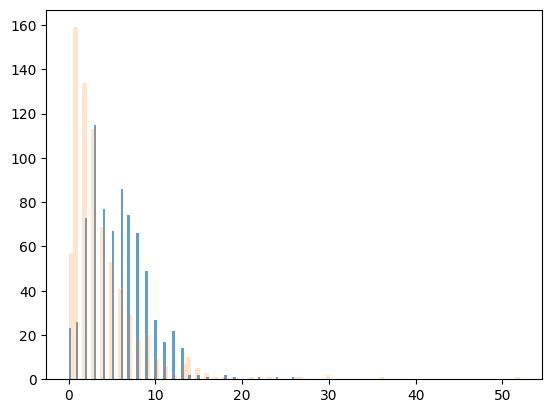

In [27]:
plt.hist(data[data['label']=='spam']['punct'],bins =100, alpha = 0.7)
plt.hist(data[data['label']=='ham']['punct'],bins =100, alpha = 0.2)
plt.show()

## Split the data into  train and test sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],train_size=0.7,random_state=0)

In [32]:
### verify the shapes of X_train, X_test, y_train and y_test
print (f"the size of X_train is {X_train.shape}")
print (f"the size of y_train is {y_train.shape}")
print (f"the size of X_test is {X_test.shape}")
print (f"the size of y_text is {y_test.shape}")

the size of X_train is (1045,)
the size of y_train is (1045,)
the size of X_test is (449,)
the size of y_text is (449,)


# Build the Random Forest model

### Encode the text data with TFIDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

### Create pipeline object and add below steps
- convert the text to vectors using TfidfVectorizer
- create the random forest classifier model on this vectorized dataset

In [35]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("Randomforest",RandomForestClassifier(n_estimators=100))])

### Train the model using pipeline

In [38]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Randomforest', RandomForestClassifier())])

### Make predictions

In [39]:
y_pred = classifier.predict(X_test)

## Model Evaluation

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score

In [42]:
accuracy_score(y_test,y_pred)

0.9532293986636972

In [43]:
confusion_matrix(y_test,y_pred)

array([[221,   1],
       [ 20, 207]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.95       222
        spam       1.00      0.91      0.95       227

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



# SVM (Support Vector Machine)

In [46]:
from sklearn.svm import SVC

In [51]:
svm = Pipeline([("tfidf",TfidfVectorizer()),("classfier",SVC(C=100,gamma='auto'))])

### Train the model using pipeline

In [52]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classfier', SVC(C=100, gamma='auto'))])

### Make predictions

In [54]:
y_pred_svm = svm.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         ham       0.85      0.99      0.91       222
        spam       0.99      0.82      0.90       227

    accuracy                           0.91       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.91      0.91       449



In [56]:
accuracy_score(y_test,y_pred_svm)

0.9064587973273942

In [58]:
confusion_matrix(y_test,y_pred_svm)

array([[220,   2],
       [ 40, 187]], dtype=int64)

## test both the models on unseeen data 

In [60]:
test1 = ['Hello, You are learning NLP']
test2 = ['Hope you are doing good and learning the new things']
test3 = ['Hurray!! You won a lottery of $5 Mliion. To claim call on 8888 888 888']

In [62]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [63]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
